In [17]:
from datetime import datetime, timedelta, timezone
import pytz
from zoneinfo import ZoneInfo
import pandas as pd

dt1 = datetime.now(timezone.utc)
datetime.now(ZoneInfo("UTC")).astimezone(pytz.timezone("Asia/Singapore"))
datetime.now(pytz.timezone("UTC")).replace(tzinfo=None)
dt2 = pd.Timestamp.now(timezone.utc)
pd.Timestamp.now(ZoneInfo("UTC")).tz_convert(ZoneInfo("Asia/Singapore"))
pd.Timestamp.now(pytz.timezone("UTC")).tz_localize(None)

dt1.date(), dt1.time(), dt2.date(), dt2.time()
dt1.year, dt1.month, dt1.day, dt1.weekday()
dt2.hour, dt2.minute, dt2.second
dt1.strftime("%Y-%m-%d %H:%M:%S")
datetime.strptime('2025-01-01', '%Y-%m-%d'), pd.to_datetime('2025-01-01', format='%Y-%m-%d')

dt_index = pd.date_range(start='2025-01-01', periods=5, freq='D', tz='UTC')
dt_index.date, dt_index.time, dt_index.month, dt_index.day
dt_index.to_pydatetime()

dt_series = pd.Series(dt_index)
dt_series.dt.year, dt_series.dt.tz_convert('Asia/Singapore')

(0    2025
 1    2025
 2    2025
 3    2025
 4    2025
 dtype: int32,
 0   2025-01-01 08:00:00+08:00
 1   2025-01-02 08:00:00+08:00
 2   2025-01-03 08:00:00+08:00
 3   2025-01-04 08:00:00+08:00
 4   2025-01-05 08:00:00+08:00
 dtype: datetime64[ns, Asia/Singapore])

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

tips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


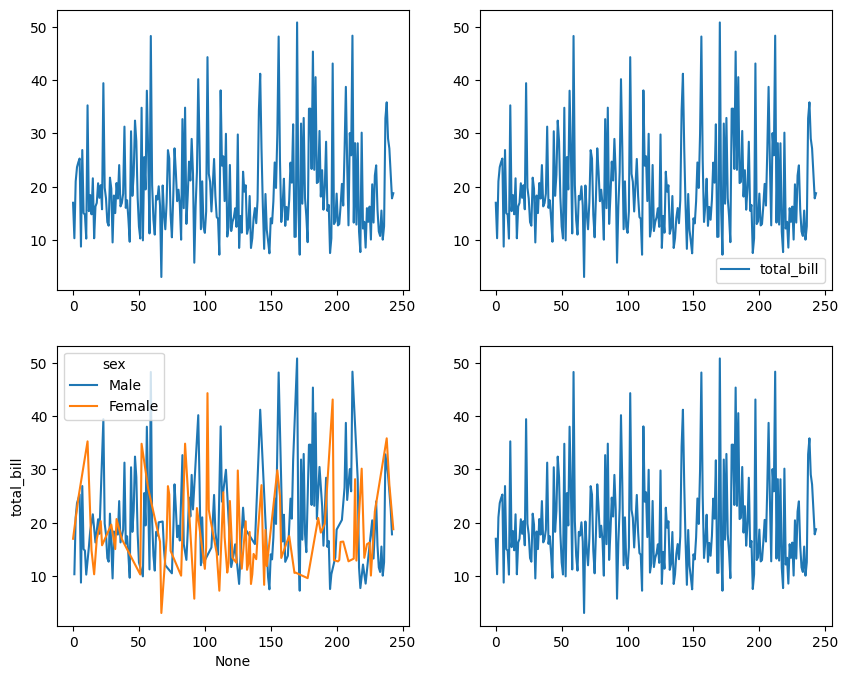

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes[0, 0].plot(tips.index, tips['total_bill'])
tips.plot(y='total_bill', ax=axes[0, 1])
sns.lineplot(data=tips, x=tips.index, y='total_bill', hue='sex', ax=axes[1, 0])
plt.plot(tips.index, tips['total_bill']) # plot last subplot (active ax)

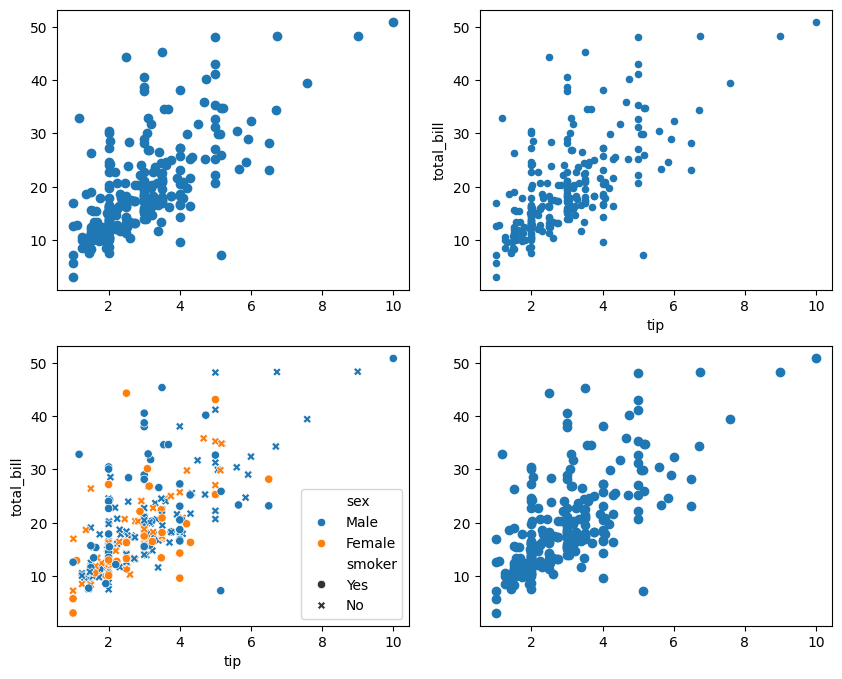

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes[0, 0].scatter(tips['tip'], tips['total_bill'])
tips.plot(kind='scatter', x='tip', y='total_bill', ax=axes[0, 1])
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='sex', style='smoker', ax=axes[1, 0])
plt.scatter(tips['tip'], tips['total_bill']) # plot last subplot (active ax)

/tmp/ipykernel_380795/2418494017.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['total_bill'].count().plot(kind='bar')


<Axes: xlabel='sex'>

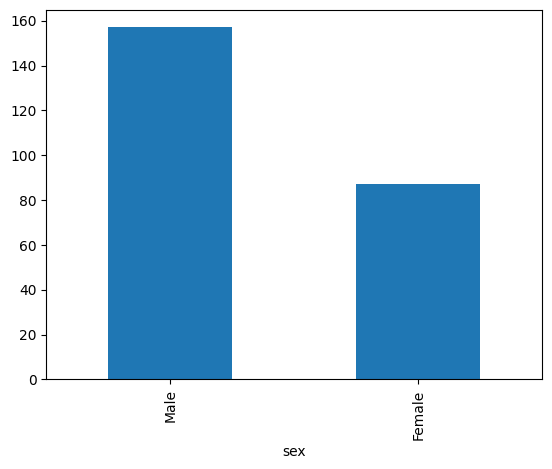

In [48]:
tips.groupby('sex')['total_bill'].count().plot(kind='bar')

/tmp/ipykernel_380795/2086773722.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_gp = tips.groupby('sex', as_index=False)[['total_bill', 'tip']].sum()
/tmp/ipykernel_380795/2086773722.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_gp1 = tips.groupby(['sex', 'smoker'], as_index=False)[['total_bill', 'tip']].sum()


<BarContainer object of 2 artists>

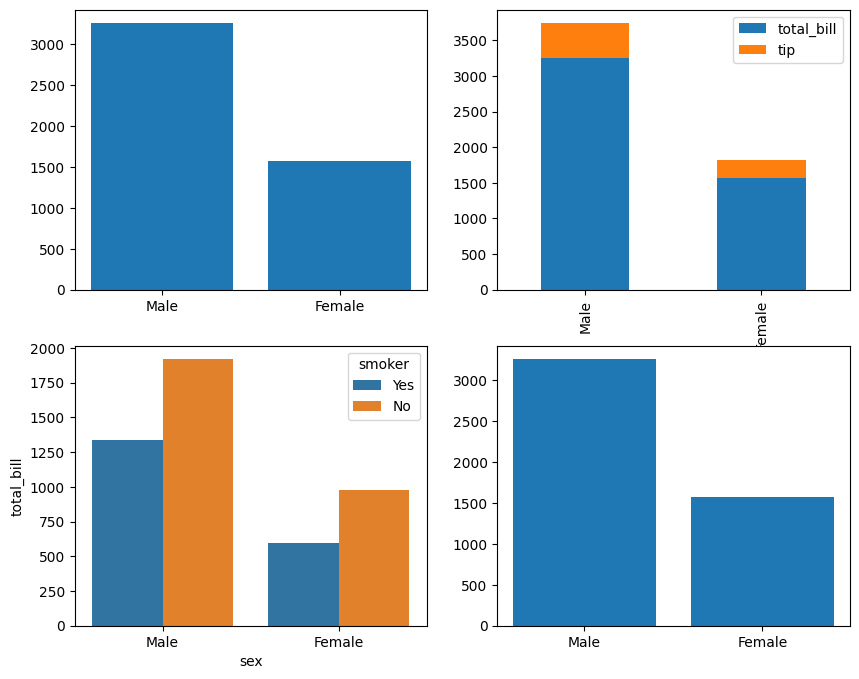

In [65]:
tips_gp = tips.groupby('sex', as_index=False)[['total_bill', 'tip']].sum()
tips_gp1 = tips.groupby(['sex', 'smoker'], as_index=False)[['total_bill', 'tip']].sum()
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes[0, 0].bar(tips_gp['sex'], tips_gp['total_bill'])
tips_gp.plot(kind='bar', x='sex', y=['total_bill', 'tip'], stacked=True, ax=axes[0, 1])
sns.barplot(data=tips_gp1, x='sex', y='total_bill', hue='smoker', ax=axes[1, 0])
plt.bar(tips_gp['sex'], tips_gp['total_bill']) # plot last subplot (active ax)

/tmp/ipykernel_380795/586666263.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot([tips[tips['sex'] == s]['total_bill'] for s in sex], labels=sex)
/tmp/ipykernel_380795/586666263.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tips[tips['sex'] == s]['total_bill'] for s in sex], labels=sex)# plot last subplot (active ax)


{'whiskers': [<matplotlib.lines.Line2D at 0x78a8e221a710>,
 'caps': [<matplotlib.lines.Line2D at 0x78a8e23c9c00>,
 'boxes': [<matplotlib.lines.Line2D at 0x78a8e221b550>,
 'medians': [<matplotlib.lines.Line2D at 0x78a8e23c88e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x78a8e236a650>,
 'means': []}

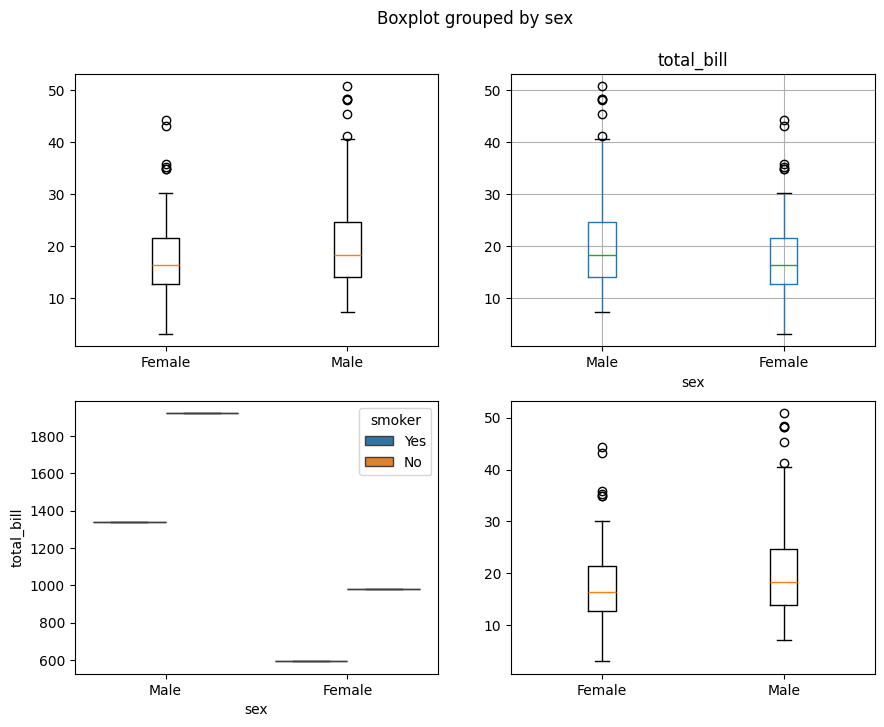

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
sex = ['Female', 'Male']
axes[0, 0].boxplot([tips[tips['sex'] == s]['total_bill'] for s in sex], labels=sex)
tips.boxplot(column='total_bill', by='sex', ax=axes[0, 1])
sns.boxplot(data=tips_gp1, x='sex', y='total_bill', hue='smoker', ax=axes[1, 0])
plt.boxplot([tips[tips['sex'] == s]['total_bill'] for s in sex], labels=sex)# plot last subplot (active ax)

(array([ 1.,  1.,  5.,  5., 20., 17., 24., 18., 26., 23., 15., 13., 11.,
        13.,  7.,  7.,  7.,  5.,  5.,  5.,  2.,  2.,  2.,  3.,  0.,  2.,
         1.,  0.,  3.,  1.]),
 array([ 3.07      ,  4.66133333,  6.25266667,  7.844     ,  9.43533333,
        11.02666667, 12.618     , 14.20933333, 15.80066667, 17.392     ,
        18.98333333, 20.57466667, 22.166     , 23.75733333, 25.34866667,
        26.94      , 28.53133333, 30.12266667, 31.714     , 33.30533333,
        34.89666667, 36.488     , 38.07933333, 39.67066667, 41.262     ,
        42.85333333, 44.44466667, 46.036     , 47.62733333, 49.21866667,
        50.81      ]),
 <BarContainer object of 30 artists>)

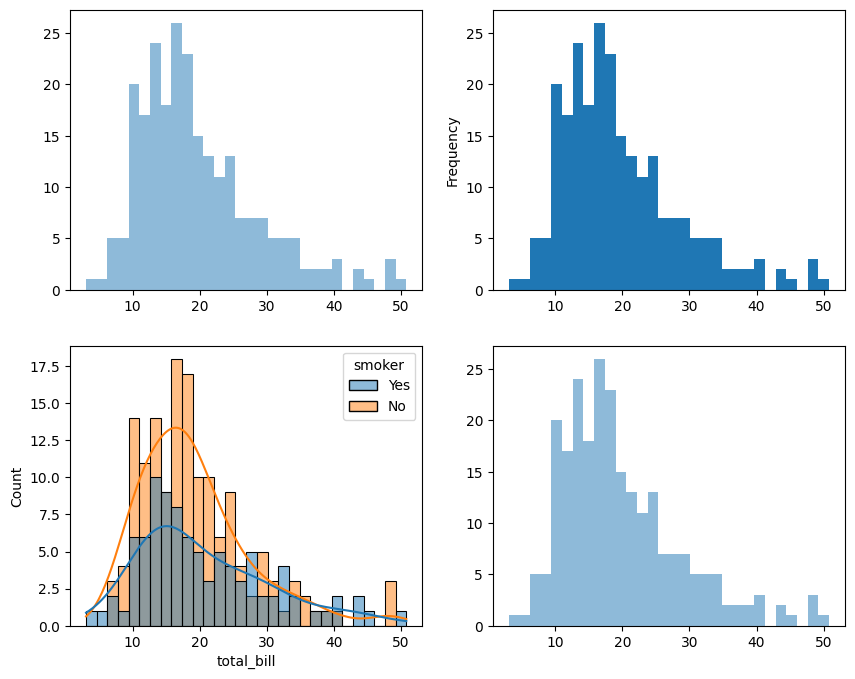

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
sex = ['Female', 'Male']
axes[0, 0].hist(tips['total_bill'], bins=30, alpha=0.5)
tips['total_bill'].plot(kind='hist', bins=30, ax=axes[0, 1])
sns.histplot(data=tips, x='total_bill', bins=30, hue='smoker', kde=True, ax=axes[1, 0])
plt.hist(tips['total_bill'], bins=30, alpha=0.5)# plot last subplot (active ax)

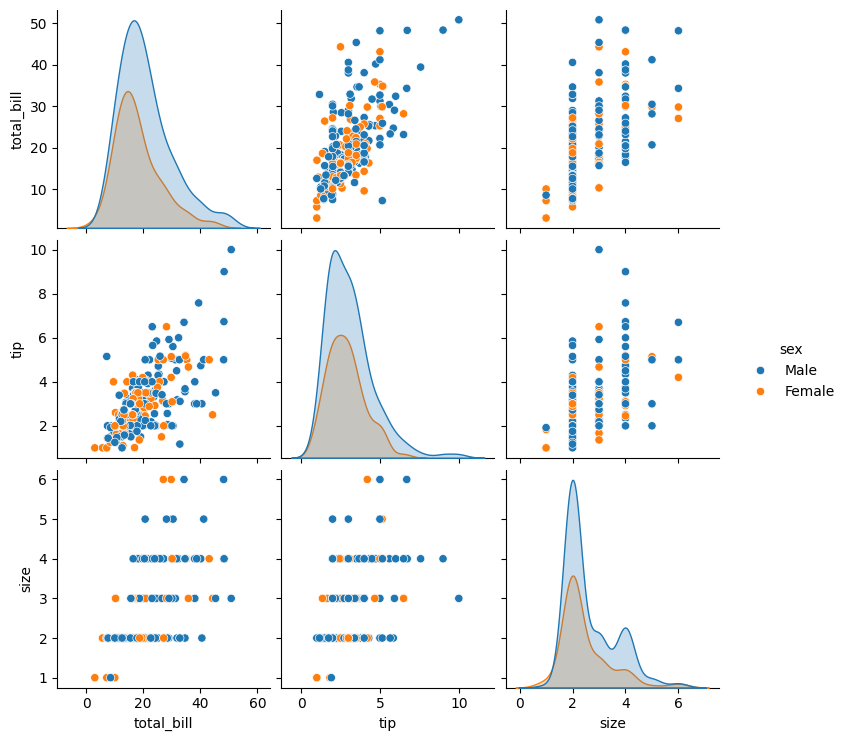

In [79]:
sns.pairplot(tips, hue='sex', diag_kind='kde')

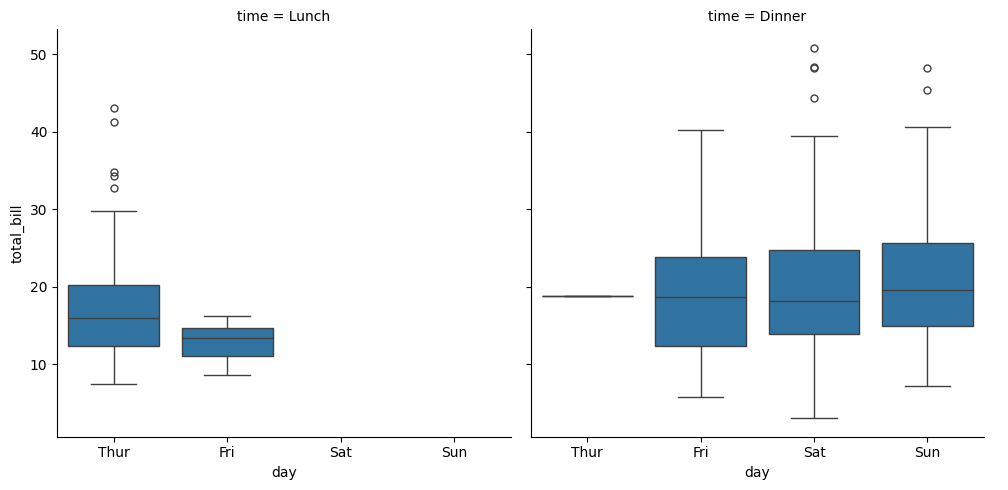

In [75]:
sns.catplot(data=tips, x='day', y='total_bill', col='time', kind='box')

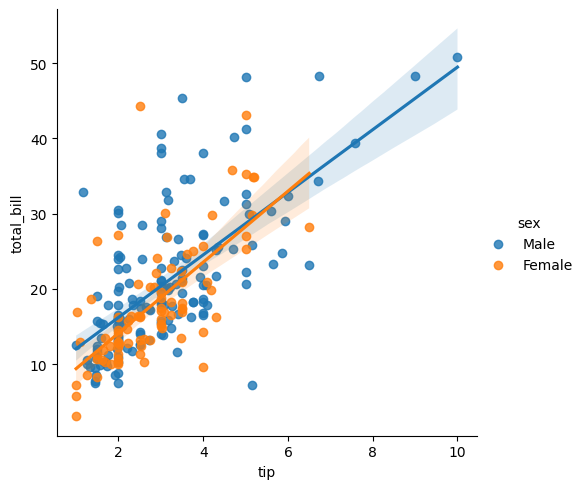

In [76]:
sns.lmplot(data=tips, x='tip', y='total_bill', hue='sex', ci=95)

<Axes: >

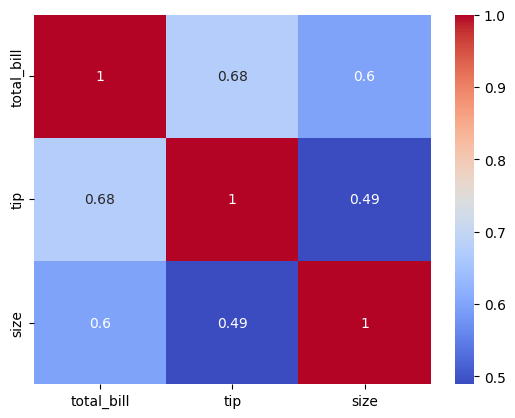

In [77]:
corr = tips.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

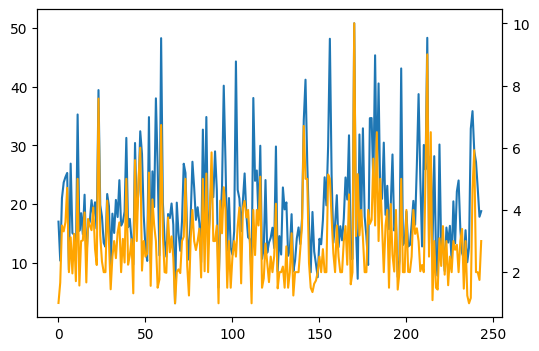

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(tips.index, tips['total_bill'])
ax1 = ax.twinx()
ax1.plot(tips.index, tips['tip'], color='orange')